# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and Exploratory Data Analysis. In order to complete this lab, you'll have to make import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
* Show mastery of the content covered in this section

## The Dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!

## Goals
* Use all available pandas knowledge to clean the dataset and deal with null values
* Use Queries and aggregations to group the data into interesting subsets as needed
* Use descriptive statistics and data visualization to find answers to questions we may have about the data. 

## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources--`heroes_information.csv` and `super_hero_powers.csv`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the head of each to ensure that everything loaded correctly.  

In [2]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')
powers_df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
heroes_df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [4]:
heroes_df.drop('Unnamed: 0', axis=1, inplace=True)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize Yourself With the Dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesnt contain

In the cell below, get the descriptive statistics of each DataFrame.  

### Heroes dataframe

In [5]:
heroes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.4+ KB


In [6]:
heroes_df.describe()

,Height,Weight
count,734.000000,732.000000
mean,102.254087,43.855191
std,139.624543,130.823733
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,175.000000,62.000000
75%,185.000000,90.000000
max,975.000000,900.000000


In [7]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [8]:
#heroes_df['Gender'].value_counts()
#heroes_df['Eye color'].value_counts()
#heroes_df['Race'].value_counts()
#heroes_df['Hair color'].value_counts()
#heroes_df['Height'].value_counts()
#heroes_df['Skin color'].value_counts()
#heroes_df['Alignment'].value_counts()
#heroes_df['Weight'].value_counts()
heroes_df['Publisher'].value_counts()

Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
George Lucas          14
Image Comics          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
Shueisha               4
IDW Publishing         4
ABC Studios            4
Icon Comics            4
Wildstorm              3
Sony Pictures          2
Hanna-Barbera          1
Microsoft              1
Rebellion              1
Universal Studios      1
Titan Books            1
South Park             1
J. R. R. Tolkien       1
J. K. Rowling          1
Name: Publisher, dtype: int64

Most variables have placeholder data. In particular:
    - Weight     '-99.0': 237
    - Alignment  '-': 7
    - Skin color '-': 662
    - Height     '-99.0': 217
    - Hair color '-': 172
    - Race       '-': 304
    - Eye color  '-': 225
    - Gender     '-': 29  

### Powers dataframe

In [9]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [10]:
powers_df.describe()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,Moses Magnum,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,...,653,651,665,658,666,666,666,665,665,665


In [11]:
powers_df.isna().sum()

hero_names               0
Agility                  0
Accelerated Healing      0
Lantern Power Ring       0
Dimensional Awareness    0
Cold Resistance          0
Durability               0
Stealth                  0
Energy Absorption        0
Flight                   0
Danger Sense             0
Underwater breathing     0
Marksmanship             0
Weapons Master           0
Power Augmentation       0
Animal Attributes        0
Longevity                0
Intelligence             0
Super Strength           0
Cryokinesis              0
Telepathy                0
Energy Armor             0
Energy Blasts            0
Duplication              0
Size Changing            0
Density Control          0
Stamina                  0
Astral Travel            0
Audio Control            0
Dexterity                0
                        ..
Intuitive aptitude       0
Vision - Microscopic     0
Melting                  0
Wind Control             0
Super Breath             0
Wallcrawling             0
V

In [12]:
powers_df.columns

Index(['hero_names', 'Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=168)

## Dealing with Null Values

Starting in the cell below, detect and deal with any null values in either data frame.  Then, explain your methodology for detecting and dealing with outliers in the markdown section below.  Be sure to explain your strategy for dealing with null values in numeric columns, as well as your strategy for dealing with null values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________

- Missing data was detected for the heroes_df, for both numeric and non-numeric data. 
- Null values will be replaced wherever possible to avoid losing data. Estimates will be used to replace the data, or the mean/median values (depending on whether the distribution is parametric or not). 
- Columns missing a large percentage of data (more than half) will be removed. 
- If only a few rows are missing data, removing them may be the best option. 

- Outliers will be detected using gross visual analysis and by looking at the min/max values vs. measures of central tendency. 


### Heroes dataframe

Text(0.5,1,'Weight Distribution before Replacing Values')

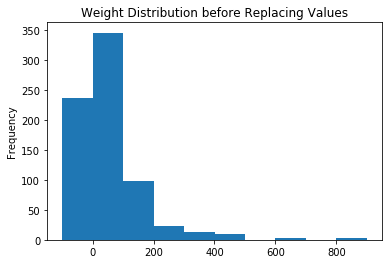

In [13]:
# For the missing and null values in 'Weight'... those values with -99 and NaN will be replaced by the median.
# The mean will not be used because the distribution is positively skewed. 

heroes_df['Weight'].plot(kind = 'hist')
plt.title('Weight Distribution before Replacing Values')

In [14]:
heroes_df['Weight'].describe()

count    732.000000
mean      43.855191
std      130.823733
min      -99.000000
25%      -99.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

In [15]:
heroes_df.loc[heroes_df['Weight'] == -99, 'Weight'] = heroes_df['Weight'].median() 

In [16]:
heroes_df['Weight'].fillna(heroes_df['Weight'].median(), inplace=True)

Text(0.5,1,'Weight Distribution after Replacing Values')

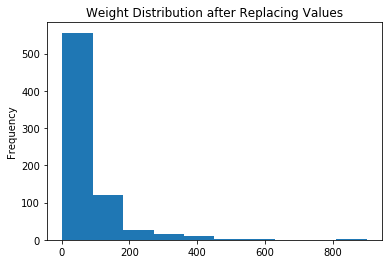

In [17]:
heroes_df['Weight'].plot(kind = 'hist')
plt.title('Weight Distribution after Replacing Values')

In [18]:
heroes_df['Weight'].describe()

count    734.000000
mean      95.889646
std       88.689658
min        2.000000
25%       62.000000
50%       62.000000
75%       90.000000
max      900.000000
Name: Weight, dtype: float64

In [19]:
heroes_df['Weight'].isna().sum()

0

The 'Publisher' missing values were replaced with the category: unknown. 

In [20]:
heroes_df['Publisher'].fillna('Unknown', inplace=True) 

In [21]:
heroes_df['Publisher'].isna().sum()
heroes_df['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', 'Unknown', 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [22]:
# 90% of skin color in the heroes dataframe is unknown; this column will therefore be deleted. 
heroes_df['Skin color'].value_counts(normalize=True)*100

-                 90.190736
green              2.861035
red                1.226158
blue               1.226158
white              0.953678
silver             0.681199
grey               0.681199
purple             0.408719
gold               0.408719
pink               0.272480
yellow             0.272480
orange / white     0.136240
gray               0.136240
orange             0.136240
black              0.136240
red / black        0.136240
blue-white         0.136240
Name: Skin color, dtype: float64

In [23]:
heroes_df.drop('Skin color', axis=1, inplace=True)
heroes_df.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0


Text(0.5,1,'Height Distribution Before Values Replaced')

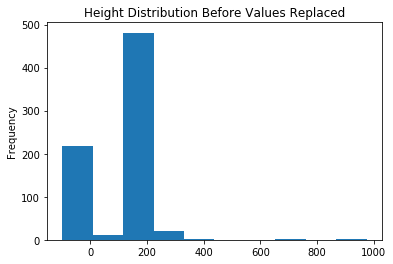

In [24]:
heroes_df['Height'].plot(kind='hist')
plt.title('Height Distribution Before Values Replaced')

In [25]:
# The placeholder values in 'Height' were replaced with the median (rather than the mean)
heroes_df['Height'].describe()

count    734.000000
mean     102.254087
std      139.624543
min      -99.000000
25%      -99.000000
50%      175.000000
75%      185.000000
max      975.000000
Name: Height, dtype: float64

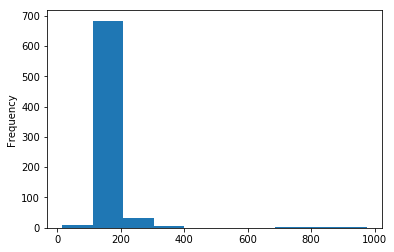

In [26]:
heroes_df.loc[heroes_df['Height'] == -99, 'Height'] = heroes_df['Height'].median()
heroes_df['Height'].describe()
heroes_df['Height'].plot(kind='hist')


In [27]:
# For all categorical variables with null data (specified with the '-' placeholder), all values were replaced with the additional
# category: unknown
heroes_df.loc[heroes_df['Alignment'] == '-', 'Alignment'] = 'Unknown'
heroes_df.loc[heroes_df['Eye color'] == '-', 'Eye color'] = 'Unknown'
heroes_df.loc[heroes_df['Hair color'] == '-', 'Hair color'] = 'Unknown'
heroes_df.loc[heroes_df['Race'] == '-', 'Race'] = 'Unknown'
heroes_df.loc[heroes_df['Gender'] == '-', 'Gender'] = 'None'

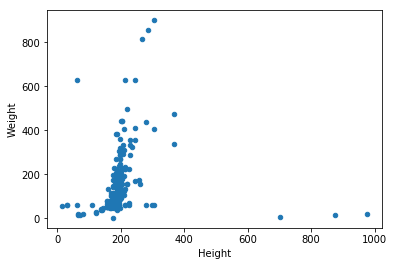

In [28]:
# A scatter plot was used to examine the relationship between weight and height and to look for outliers. 
heroes_df.plot('Height', 'Weight', kind='scatter')

In [29]:
# The following three superheroes were outliers for height
heroes_df.loc[heroes_df['Height'] > 600]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,good,18.0
272,Galactus,Male,black,Cosmic Entity,Black,876.0,Marvel Comics,neutral,16.0
302,Groot,Male,yellow,Flora Colossus,Unknown,701.0,Marvel Comics,good,4.0


In [30]:
# A handful of superheroes were also outliers for weight
heroes_df.loc[heroes_df['Weight']> 600]

# Depending on analytics to be run, it may be better to remove the outliers. For now, they will be left in the dataset as they
# are extreme values, but arguably not a different population of super-hero. 

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
203,Darkseid,Male,red,New God,No Hair,267.0,DC Comics,bad,817.0
283,Giganta,Female,green,Unknown,Red,62.5,DC Comics,bad,630.0
331,Hulk,Male,green,Human / Radiation,Green,244.0,Marvel Comics,good,630.0
373,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,neutral,855.0
549,Red Hulk,Male,yellow,Human / Radiation,Black,213.0,Marvel Comics,neutral,630.0
575,Sasquatch,Male,red,Unknown,Orange,305.0,Marvel Comics,good,900.0


## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** If the join throws an error message, consider settin the the column you want to join on as the index for each DataFrame.  

The powers_df contains 666 entries, while the heros_df is 734 entries. Joining them, then, will either result in adding all of the data from the powers_df that matches the heroes_df, and null values where there is no matching information (Outer Join). Or a new dataframe can be generated containing only that information which is common to both existing dataframes (Inner, Left, Right). 

In [31]:
powers_df.rename(columns = {'hero_names':'name'}, inplace = True)
powers_df.head()

,name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
# Name will be used to index both dataframes so that they can be joined according to this common variable. 
powers_df.set_index('name', inplace=True)
powers_df.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
3-D Man,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
heroes_df.set_index('name', inplace=True)
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0


In [34]:
joined_df = heroes_df.join(powers_df, on = 'name', how = 'inner')
joined_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,Accelerated Healing,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,True,True,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,False,True,...,False,False,False,False,False,False,False,False,False,False
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
joined_df.groupby('Gender')['Height', 'Weight'].mean()


,Height,Weight
Gender,,
Female,174.806180,75.544944
Male,187.946121,107.178879
None,176.333333,106.388889


In [36]:
#joined_df.index
#joined_df.set_index('Gender', inplace=True)
#joined_df.head()

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

Text(0.5,1,'Male Weight to Height Relationship')

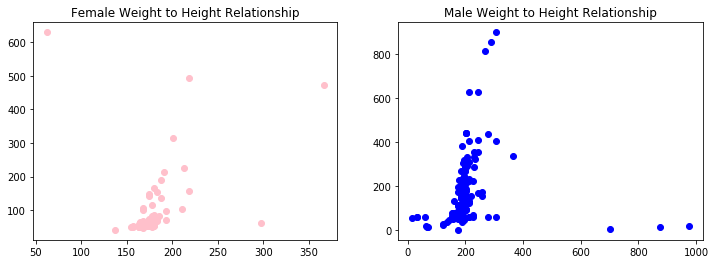

In [37]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x1 = joined_df.loc[joined_df['Gender'] == 'Female']['Height']
y1 = joined_df.loc[joined_df['Gender'] == 'Female']['Weight']
x2 = joined_df.loc[joined_df['Gender'] == 'Male']['Height']
y2 = joined_df.loc[joined_df['Gender'] == 'Male']['Weight']

ax1.scatter(x1, y1, color='pink')
ax1.set_title('Female Weight to Height Relationship')


ax2.scatter(x2, y2, color='blue')
ax2.set_title('Male Weight to Height Relationship')
#female = joined_df.loc[joined_df['Gender'] == 'Female'].plot('Height', 'Weight', kind = 'scatter', color='Pink')


## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [38]:
male_heroes_df = joined_df.loc[joined_df['Gender'] == 'Male']
female_heroes_df = joined_df.loc[joined_df['Gender'] == 'Female']

def show_distplot(dataframe, gender, column_name):
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot(121)
    x = dataframe.loc[dataframe['Gender'] == gender][column_name]
    return sns.distplot(x, ax=ax, hist=True)

AxesSubplot(0.125,0.125;0.352273x0.755)
min        15.200000
max       975.000000
mean      187.946121
std        60.662029
median    183.000000
Name: Height, dtype: float64


C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


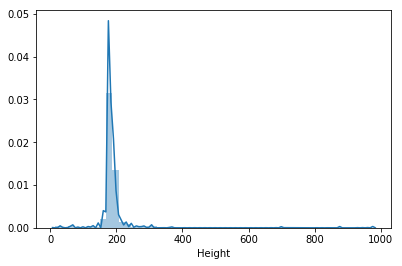

In [39]:
# Male Height
print(show_distplot(joined_df, 'Male', 'Height'))
print(male_heroes_df['Height'].agg(['min', 'max', 'mean', 'std', 'median']))




AxesSubplot(0.125,0.125;0.352273x0.755)
min         2.000000
max       900.000000
mean      107.178879
std        98.812475
median     79.000000
Name: Weight, dtype: float64


C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


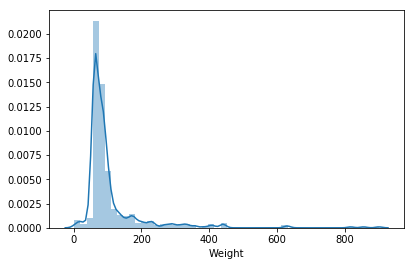

In [40]:
# Male Weight
print(show_distplot(joined_df, 'Male', 'Weight'))
print(male_heroes_df['Weight'].agg(['min', 'max', 'mean', 'std', 'median']))

AxesSubplot(0.125,0.125;0.352273x0.755)
min        62.500000
max       366.000000
mean      174.806180
std        21.283341
median    175.000000
Name: Height, dtype: float64


C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


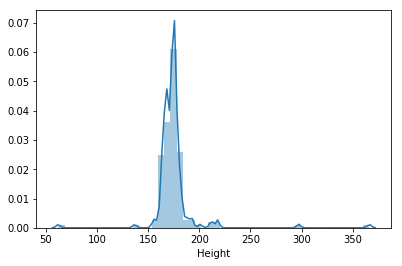

In [41]:
# Female Height
print(show_distplot(joined_df, 'Female', 'Height'))
print(female_heroes_df['Height'].agg(['min', 'max', 'mean', 'std', 'median']))

C:\Users\Danyal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


AxesSubplot(0.125,0.125;0.352273x0.755)
min        41.000000
max       630.000000
mean       75.544944
std        69.006515
median     61.000000
Name: Weight, dtype: float64


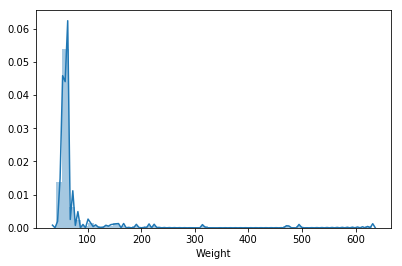

In [42]:
# Female Weight
print(show_distplot(joined_df, 'Female', 'Weight'))
print(female_heroes_df['Weight'].agg(['min', 'max','mean', 'std', 'median']))

Discuss your findings from the plots above, with respect to the distibution of height and weight by gender.  Your explanation should include discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Wite your answer below this line:
____________________________________________________________________________________________________________________________
Most of the weight and height distributions for female and male heroes are positively skewed due to a few upper extremes. The least skewed distribution is female height - which has an almost identical mean and median. For all other distributions, the difference between the median and mean demonstrates the influence of extreme cases on the mean.  


### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

In [43]:
# Change Type bool to str, and then to int, for one column 

#powers_df.Agility = powers_df.Agility.astype('str')
#print(powers_df.Agility.dtype)

# Replacing the true/false values with the names of the powers (columns) for each superhero might result in a more easily 
# interpretable dataframe. 

#powers_df.loc[powers_df['Agility'] == 'True', 'Agility'] = '1'
#powers_df.loc[powers_df['Agility'] == 'False', 'Agility'] = '0'

#powers_df.Agility = powers_df.Agility.astype('int32')
#print(powers_df.Agility.dtype)

In [44]:
powers_df2 = pd.DataFrame(np.sum(powers_df))
powers_df2.rename(columns = {0: 'Counts'}, inplace=True)


In [45]:
powers_df2.sort_values('Counts', ascending=False).head()

,Counts
Super Strength,360
Stamina,289
Durability,257
Super Speed,249
Agility,242


In [46]:
DC = joined_df.loc[joined_df['Publisher'] == 'DC Comics']
DC.head()
DC_powers = pd.DataFrame(np.sum(DC))



In [47]:
DC_powers.rename(columns = {0: 'Counts'}, inplace=True)

In [48]:
DC_powers.drop(['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Alignment', 'Weight'], inplace=True)


In [49]:
DC_powers.loc[DC_powers['Counts'] == False, 'Counts'] = 0
DC_powers.loc[DC_powers['Counts'] == True,'Counts'] = 1


In [50]:
DC_powers.sort_values('Counts', ascending=False).head()

,Counts
Super Strength,109
Stamina,90
Flight,86
Super Speed,79
Durability,71


In [51]:
marvel = joined_df.loc[joined_df['Publisher'] == 'Marvel Comics']

In [52]:
marvel_powers = pd.DataFrame(np.sum(marvel))

In [53]:
marvel_powers.rename(columns = {0: 'Counts'}, inplace=True)

In [54]:
marvel_powers.drop(['Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Alignment', 'Weight'], inplace=True)


In [55]:
marvel_powers.loc[marvel_powers['Counts'] == False, 'Counts'] = 0
marvel_powers.loc[marvel_powers['Counts'] == True,'Counts'] = 1

In [56]:
marvel_powers.sort_values('Counts', ascending=False).head()

,Counts
Super Strength,204
Durability,154
Stamina,150
Super Speed,137
Agility,126


Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Wite your answer below this line:
____________________________________________________________________________________________________________________________
* Top 5 for DC: Super Strength, Stamina, Flight, Super Speed, Durability
* Top 5 for Marvel: Super Strength, Durability, Stamina, Super Speed, Agility
* Top 5 overall: Super Strength, Stamina, Durability, Super Speed, Agility

The DC and Marvel top five powers are the same, except that Marvel includes Flight and DC includes Agility. 

### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occuring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

In [80]:
powers = joined_df.drop(['Gender','Height', 'Weight' ,'Eye color', 'Race', 'Hair color', 'Publisher', 'Alignment'], axis = 1)
powers.head()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
name,,,,,,,,,,,,,,,,,,,,,
A-Bomb,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abe Sapien,True,True,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abin Sur,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abomination,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Abraxas,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
powers_aggr = pd.DataFrame(powers.stack(level=-1))

powers_aggr


0
name                               
A-Bomb Agility                False
       Accelerated Healing     True
       Lantern Power Ring     False
       Dimensional Awareness  False
       Cold Resistance        False
       Durability              True
       Stealth                False
       Energy Absorption      False
       Flight                 False
       Danger Sense           False
       Underwater breathing   False
       Marksmanship           False
       Weapons Master         False
       Power Augmentation     False
       Animal Attributes      False
       Longevity               True
       Intelligence           False
       Super Strength          True
       Cryokinesis            False
       Telepathy              False
       Energy Armor           False
       Energy Blasts          False
       Duplication            False
       Size Changing          False
       Density Control        False
       Stamina                 True
       Astral Travel          False
       Audio Control          False
       Dexterity              False
       Omnitrix               False
...                             ...
Zoom   Intuitive aptitude     False
       Vision - Microscopic   False
       Melting                False
       Wind Control           False
       Super Breath           False
       Wallcrawling           False
       Vision - Night         False
       Vision - Infrared      False
       Grim Reaping           False
       Matter Absorption      False
       The Force              False
       Resurrection           False
       Terrakinesis           False
       Vision - Heat          False
       Vitakinesis            False
       Radar Sense            False
       Qwardian Power Ring    False
       Weather Control        False
       Vision - X-Ray         False
       Vision - Thermal       False
       Web Creation           False
       Reality Warping        False
       Odin Force             False
       Symbiote Costume       False
       Speed Force            False
       Phoenix Force          False
       Molecular Dissipation  False
       Vision - Cryo          False
       Omnipresent            False
       Omniscient             False

[110220 rows x 1 columns]

In [82]:
powers_2 = powers_aggr.reset_index()

In [83]:
powers_2.rename(columns = {0: 'Counts'}, inplace=True)
powers_2.rename(columns = {'level_1': 'Power'}, inplace=True)
powers_2.rename(columns = {'name': 'Name'}, inplace=True)
powers_2.head()

,Name,Power,Counts
0,A-Bomb,Agility,False
1,A-Bomb,Accelerated Healing,True
2,A-Bomb,Lantern Power Ring,False
3,A-Bomb,Dimensional Awareness,False
4,A-Bomb,Cold Resistance,False


In [94]:
heroes_df.head()

,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
name,,,,,,,,
A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
Abraxas,Male,blue,Cosmic Entity,Black,175.0,Marvel Comics,bad,62.0


In [88]:
powers_2.drop(powers_2[powers_2['Counts'] == False].index, inplace=True)
powers_2.describe()
powers_2.head()

,Name,Power,Counts
1,A-Bomb,Accelerated Healing,True
5,A-Bomb,Durability,True
15,A-Bomb,Longevity,True
17,A-Bomb,Super Strength,True
25,A-Bomb,Stamina,True


1       Name                        A-Bomb
        Power          Accelerated Healing
        Counts                        True
5       Name                        A-Bomb
        Power                   Durability
        Counts                        True
15      Name                        A-Bomb
        Power                    Longevity
        Counts                        True
17      Name                        A-Bomb
        Power               Super Strength
        Counts                        True
25      Name                        A-Bomb
        Power                      Stamina
        Counts                        True
50      Name                        A-Bomb
        Power                   Camouflage
        Counts                        True
63      Name                        A-Bomb
        Power              Self-Sustenance
        Counts                        True
167     Name                    Abe Sapien
        Power                      Agility
        Cou

In [92]:
powers_3 = powers_2.groupby('Name')['Power'].unique()

In [93]:
powers_3.reset_index()

,Name,Power
0,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
1,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
2,Abin Sur,[Lantern Power Ring]
3,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."
4,Abraxas,"[Dimensional Awareness, Flight, Intelligence, ..."
5,Absorbing Man,"[Cold Resistance, Durability, Energy Absorptio..."
6,Adam Monroe,"[Accelerated Healing, Immortality, Regeneration]"
7,Adam Strange,"[Durability, Stealth, Flight, Marksmanship, We..."
8,Agent Bob,[Stealth]
9,Agent Zero,"[Energy Absorption, Longevity, Super Strength,..."


## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data